# Clustering

In [1]:
import pandas as pd
beer = pd.read_csv('./resources/data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
X = beer[["calories", "sodium", "alcohol", "cost"]]
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


## K-means clustering

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [4]:
print(km.labels_)
print(km2.labels_)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 2 0 0 2 1]
[1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0]


In [5]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
# rank the results
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
16,Hamms,139,19,4.4,0.43,0,1


In [6]:
from pandas.tools.plotting import scatter_matrix

cluster_centers = km.cluster_centers_
cluster_centers_2 = km2.cluster_centers_

In [7]:
print(cluster_centers)
print()
print(cluster_centers_2)

[[ 150.           17.            4.52142857    0.52071429]
 [ 102.75         10.            4.075         0.44      ]
 [  70.           10.5           2.6           0.42      ]]

[[  91.83333333   10.16666667    3.58333333    0.43333333]
 [ 150.           17.            4.52142857    0.52071429]]


In [8]:
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,1
1,102.75,10.0,4.075000,0.440000,0
2,70.00,10.5,2.600000,0.420000,0


In [9]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.333333
1,150.000000,17.000000,4.521429,0.520714,0.000000


In [10]:
centers = beer.groupby("cluster").mean().reset_index()

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0,0.5,'Alcohol')

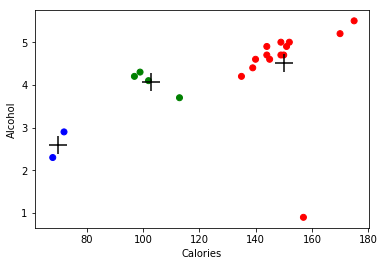

In [12]:
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")

/Users/jkchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Text(0.5,0.98,'With 3 centroids initialized')

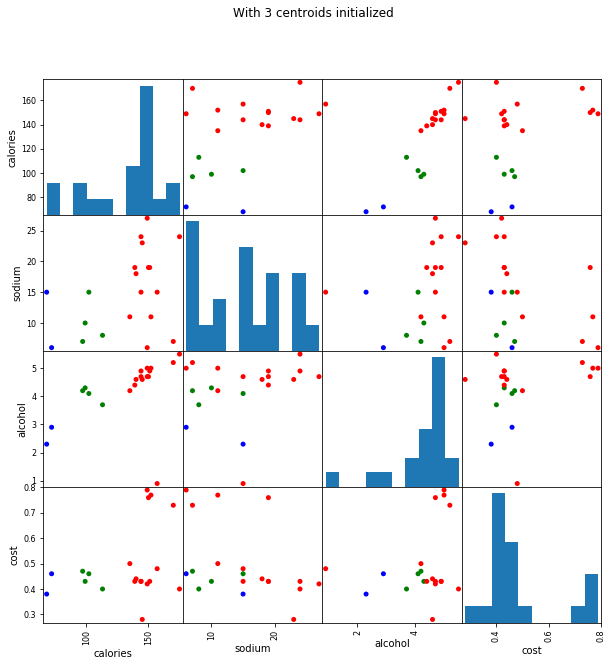

In [21]:
# cross compare every two features
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

/Users/jkchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Text(0.5,0.98,'With 2 centroids initialized')

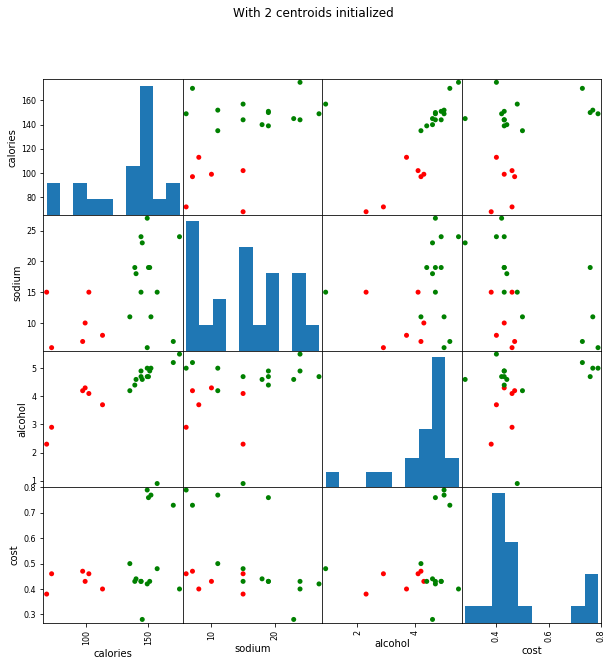

In [22]:
# cross compare every two features
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

### Scaled data

In [15]:
# Normalized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [17]:
km = KMeans(n_clusters=3).fit(X_scaled)
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,1,0
1,Schlitz,151,19,4.9,0.43,0,1,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0
16,Hamms,139,19,4.4,0.43,0,1,0
5,Old_Milwaukee,145,23,4.6,0.28,0,1,0
6,Augsberger,175,24,5.5,0.40,0,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1,0
10,Coors,140,18,4.6,0.44,0,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,0,1
12,Michelob_Light,135,11,4.2,0.50,0,1,1


In [18]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,148.375,21.125,4.7875,0.4075,0.0,1.00
1,105.375,10.875,3.3250,0.4475,1.0,0.25
2,155.250,10.750,4.9750,0.7625,0.0,1.00


/Users/jkchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


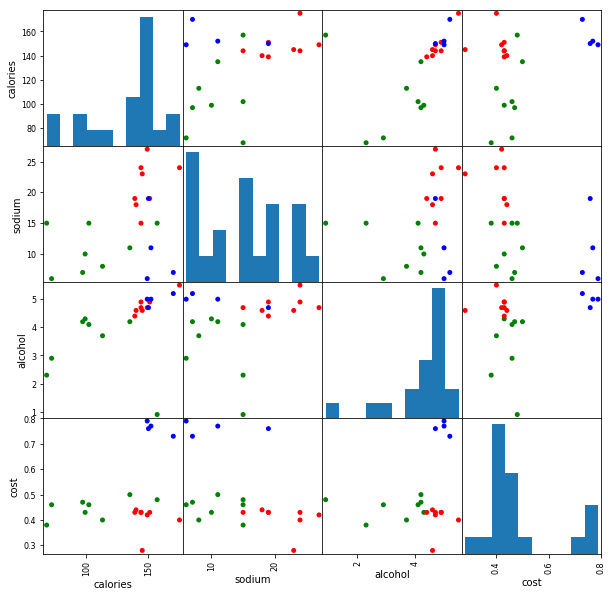

In [20]:
pd.scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100);

### Clustering Evaluation (Silhouette )
Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object lies within its cluster.<br/><br/>
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.<br/><br/>

### Definition:
For each datum $i$, <br/>

let `a(i)` be the average distance between `i` and all other data within the same cluster. We can interpret a(i) as a measure of how well i is assigned to its cluster (the smaller the value, the better the assignment). <br/>

We then define the average dissimilarity of point i to a cluster `c` as the average of the distance from i to all points in c.<br/><br/>

Let `b(i)` be the lowest average distance of `i` to all points in any other cluster, of which 
i is not a member. The cluster with this lowest average dissimilarity is said to be the "neighbouring cluster" of i because it is the next best fit cluster for point i. We now define a silhouette:
$$s(i) = \frac{b(i) - a(i)}{\max\{a(i),b(i)\}}$$

<br/>
$$s(i) = \begin{cases}
  1-a(i)/b(i), & \mbox{if } a(i) < b(i) \\
  0,  & \mbox{if } a(i) = b(i) \\
  b(i)/a(i)-1, & \mbox{if } a(i) > b(i) \\
\end{cases}
$$<br/>
in which,<br/>
 $$-1 \le s(i) \le 1$$

<br/><br/>

--> if si close to 1, interpret the cluster is tightly grouped
--> if si close to -1,iterpret that i is close to the neighbouring clustering

In [23]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster)
print(score_scaled, score)

0.179780680894 0.673177504646


the normalized data got worse a result
### For a range of K values:

In [25]:
scores = []
for k in range(2, 20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)
scores

[0.69176560340794857,
 0.67317750464557957,
 0.58570407211277953,
 0.42254873351720201,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.41282646329875183,
 0.34597752371272478,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.28495140011748982,
 0.23498077333071996,
 0.15880910174962809,
 0.084230513801511767]

Text(0,0.5,'Sihouette Score')

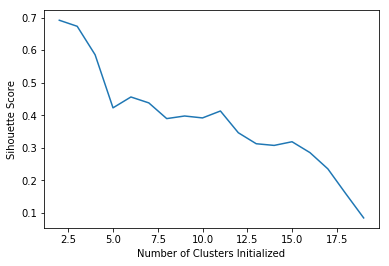

In [26]:
# visualise the scores
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

## DBSCAN

In [28]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)
labels = db.labels_

In [29]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,0,1,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,2,-1
6,Augsberger,175,24,5.5,0.40,0,1,0,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0,0
16,Hamms,139,19,4.4,0.43,0,1,0,0
14,Kirin,149,6,5.0,0.79,0,1,2,0
13,Becks,150,19,4.7,0.76,0,1,2,0
12,Michelob_Light,135,11,4.2,0.50,0,1,1,0
10,Coors,140,18,4.6,0.44,0,1,0,0
0,Budweiser,144,15,4.7,0.43,0,1,0,0


In [30]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,0.666667
1,99.333333,10.666667,4.200000,0.453333,1.000000,0.000000,1.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,0.000000,1.000000


/Users/jkchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


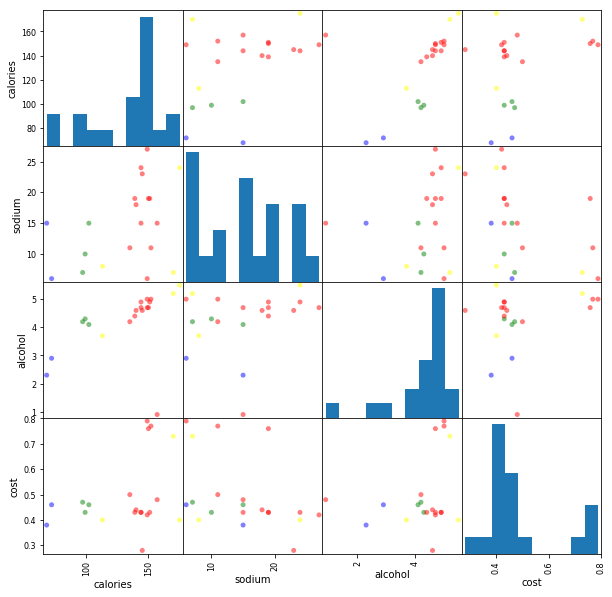

In [31]:
pd.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100);

In [33]:
score = metrics.silhouette_score(X,beer.cluster_db)
score

0.49530955296776086